# Import libraries for plotting and simulation data

In [25]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import Sim_functions2 as sim_func
plt.style.use('classic')

# User options

In [36]:
# user options
calc_options1={ 
    'direction':'u',
    #'sim_dir':'/home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/Nudging/C_0.1_updated/SOLUT/',
    #'sim_dir':'/home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/Nudging/C_0.1/',
    'sim_dir':'/home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/OI/C_0.1/',
    'manufactured':False,
    'method':0,
    'option':2,             # order of taylor derivative difference scheme (option 2 means second order accurate), or option for manufactured solution type
    'xi':4,                 # if box_probe [0-19] elif vtu [0-80]
    'yi':9,                 # if box_probe [0-10] elif vtu [0-90]
    'read_from':'box_probe',      # ['box_probe','vtu']
    #'vtu':'Box_Output',     # vtu file name
   #'read_from':'box_probe' # ['box_probe','vtu']
    'sim_var':'U',
    #'X_interp_pts':126j,
    #'Y_interp_pts':169j,
    #'X_interp_pts':12j,
    #'Y_interp_pts':16j,
    #'Z_interp_pts':26j,
    # 'Z_interp_pts':1j,
            }

# Plot raw data

In [37]:
#plt.style.use('classic')

## Plot instantaneous and mean data

  simulation reading U-X from /home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/OI/C_0.1/
  simulation reading X from /home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/OI/C_0.1/
  simulation reading Y from /home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/OI/C_0.1/
  simulation reading Z from /home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/OI/C_0.1/


<IPython.core.display.Javascript object>


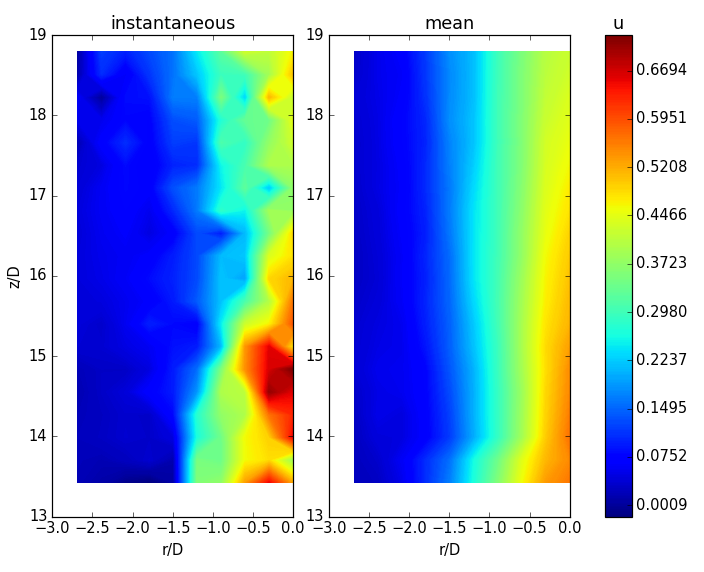

In [38]:
sim=sim_func.sim(calc_options1)
sim.read_probe()
fig=plt.figure(figsize=(8,6.5))
ax1=plt.subplot2grid((1,100),(0,0),colspan=45)
ax2=plt.subplot2grid((1,100),(0,45),colspan=45)
ax3=plt.subplot2grid((1,100),(0,90),colspan=10)
umin=sim.Uall[10,:,:,0].min()
umax=sim.Uall[10,:,:,0].max()
colorvalues=np.linspace(umin,umax,300)
ax1.set_title('instantaneous')
c1=ax1.contourf(
    sim.Yall[:,:,0],
    sim.Xall[:,:,0],
    sim.Uall[10,:,:,0],
    colorvalues,
    cmap='jet'
)
ax2.set_title('mean')
ax2.contourf(
    sim.Yall[:,:,0],
    sim.Xall[:,:,0],
    np.mean(sim.Uall[:,:,:,:],axis=(0,-1)),
    colorvalues,
    cmap='jet'
)
ax1.set_xlabel('r/D')
ax1.set_ylabel('z/D')
ax2.set_xlabel('r/D')
ax1.axis('scaled')
ax2.axis('scaled')
ax3.set_title('u')
plt.colorbar(c1,cax=ax3)
plt.tight_layout()

# Plot time correlations

<IPython.core.display.Javascript object>


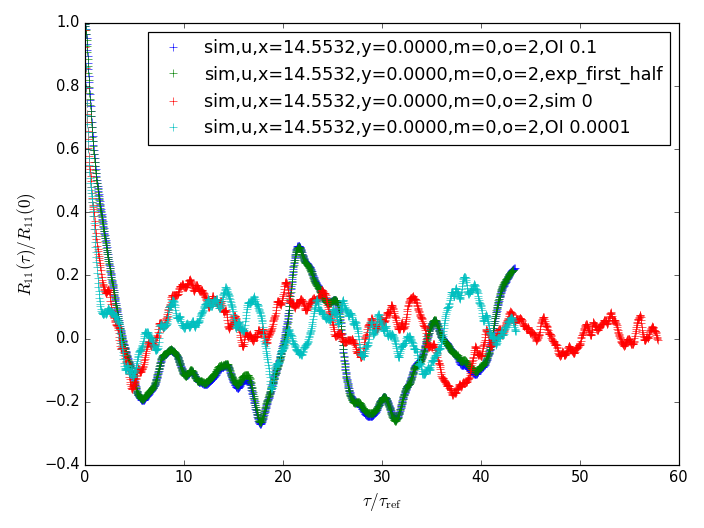

  simulation reading U-X from /home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/OI/C_0.1/
  simulation reading X from /home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/OI/C_0.1/
  simulation reading Y from /home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/OI/C_0.1/
  simulation reading Z from /home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/OI/C_0.1/
  simulation reading U-X from /home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/Nudging_Old/C_0.1_updated/Experimental_BoxProbe/
  simulation reading X from /home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/Nudging_Old/C_0.1_updated/Experimental_BoxProbe/
  simulation reading Y from /home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/Nudging_Old/C_0.1_updated/Experimental_BoxProbe/
  simulation reading Z from /home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/Nudging_Old/C_0.1_updated/Experimental_BoxProbe/
  simulation reading U-X from /home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/OI

In [42]:
# plot
fig=plt.figure()
ax=plt.subplot(111)
# normal simulation with nudging
calc_options1['sim_dir']='/home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/OI/C_0.1/'
sim=sim_func.sim(calc_options1)
sim.R11_tau_calc_plot(ax,label='OI 0.1')

# experimental boxplot data
calc_options2=calc_options1.copy()
calc_options2['sim_dir']='/home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/Nudging_Old/C_0.1_updated/Experimental_BoxProbe/'
exp_box=sim_func.sim(calc_options2)
exp_box.R11_tau_calc_plot(ax,label='exp_first_half')

# simulation C_0 
calc_options3=calc_options1.copy()
#calc_options3['sim_dir']='/home/shaun/Desktop/DA/Create_Plots/DA_paper/OI/C_0/SOLUT/'
calc_options3['sim_dir']='/home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/OI/C_0/'
sim_only=sim_func.sim(calc_options3)
sim_only.R11_tau_calc_plot(ax,label='sim 0')

# simulation 
calc_options4=calc_options1.copy()
#calc_options3['sim_dir']='/home/shaun/Desktop/DA/Create_Plots/DA_paper/OI/C_0/SOLUT/'
calc_options4['sim_dir']='/home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/OI/C_0.0001/'
sim_2=sim_func.sim(calc_options4)
sim_2.R11_tau_calc_plot(ax,label='OI 0.0001')

sim_2.plot_axis_labels_tau(ax)
plt.tight_layout()

In [35]:
class exp_avg:
    def __init__(self,ave_u_npy,ave_v_npy,mat_filename):
        self.ave_u_npy=ave_u_npy
        self.ave_v_npy=ave_v_npy
        self.mat_filename=mat_filename
    def load(self):
        expv=np.load(self.ave_v_npy)
        expu=np.load(self.ave_u_npy)
        # read in X and Y
        f=h5py.File(mat_filename)
        expX = np.array(f['X'][0,:])
        expY = np.array(f['Y'][0,:])
        D_ref=0.00745
        U_ref=27.5
        expY=expY/(1000.)+15.*D_ref # mm to m and 15 diam. downstream
        expX=expX/1000.-(1.15*D_ref) # centered between nozzles
        # non-dimensionalize everything
        expX = expX/D_ref
        expY = expY/D_ref
        expv = expv/U_ref
        expu = expu/U_ref
        # make mesh grid for plotting
        expX,expY=np.meshgrid(expX,expY,indexing='ij')

        # save non-dimensional data to self
        self.u=expu
        self.v=expv
        self.x=expX
        self.y=expY
    def center_line(self):
        self.XCL,self.YCL=np.mgrid[0:1:1j,self.y.min():self.y.max():100j] # make grid of slice down the middle (if more data is given, can do slice of whole domain to get the whole experimental region)
        points=np.array([self.x.flatten(),self.y.flatten()]).T
        self.VCL=griddata(points,self.v.flatten(),(self.XCL,self.YCL),method='linear')
        self.UCL=griddata(points,self.u.flatten(),(self.XCL,self.YCL),method='linear')